In [55]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib import cm
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow import keras
from sklearn.model_selection import train_test_split
import datetime

## (0): Required Functions:

### (0.1): SymPy Lambdify

In [2]:
def sympy_lambdify_expression(
        sympy_variables: list[sp.Symbol] | tuple[sp.Symbol, ...],
        sympy_expression: sp.Expr):
    """
    ## Description:
    Here, we assume you have defined (i) a collection of SymPy Symbols and
    (ii) a SymPy expression composed of those symbols. Now, we simply turn
    that SymPy function of those symbols into a Python function through
    SymPy's lambdify function.

    ## Arguments:
    1. `sympy_variables` (sp.Symbol)
    2. `sympy_expression` (int)
    """
    return sp.lambdify(sympy_variables, sympy_expression, 'numpy')

## (1.1): Define SymPy symbols:

In [3]:
independent_variable_symbols = sp.symbols("x y")

### (1.1.1): Verify the symbols worked:

In [4]:
independent_variable_symbols[0]

x

In [5]:
independent_variable_symbols[1]

y

## (1.2): Make an ansatz for $X(x)$ and $Y(y)$

In [6]:
# # X(x):
# X_function_of_x = independent_variable_symbols[0]**2 + sp.exp(independent_variable_symbols[0])

# # Y(y):
# Y_function_of_y = 1. / (0.05**2 + independent_variable_symbols[1]**2)

# # f(x, q):
# f_function_of_x_and_y = (independent_variable_symbols[0]**2 + sp.exp(independent_variable_symbols[0])) / (0.05**2 + independent_variable_symbols[1]**2)

In [7]:
# X(x):
X_function_of_x = sp.sin(2. * sp.pi * independent_variable_symbols[0])

# Y(y):
Y_function_of_y = sp.exp(-1.0 * independent_variable_symbols[1]**2)

# f(x, q):
f_function_of_x_and_y = sp.sin(2. * sp.pi * independent_variable_symbols[0]) * sp.exp(-1.0 * independent_variable_symbols[1]**2)


### (1.2.1): Verify the functions worked:

In [8]:
X_function_of_x

sin(2*pi*x)

In [9]:
Y_function_of_y

exp(-1.0*y**2)

In [10]:
f_function_of_x_and_y

exp(-1.0*y**2)*sin(2*pi*x)

## (1.3): Lambdify the symbolic functions:

In [11]:
lambdified_X_function_of_x = sympy_lambdify_expression(independent_variable_symbols[0], X_function_of_x)
lambdified_Y_function_of_y = sympy_lambdify_expression(independent_variable_symbols[1], Y_function_of_y)
lambdified_f_function_of_x_and_y = sympy_lambdify_expression(independent_variable_symbols, f_function_of_x_and_y)

### (1.3.1): Testing N(x):

In [12]:
lambdified_X_function_of_x(0)

0.0

### (1.3.2): Testing F(q)

In [13]:
lambdified_Y_function_of_y(0)

1.0

### (1.3.3): Testing $f(x, y)$:

In [14]:
lambdified_f_function_of_x_and_y(0., 0.)

0.0

## (1.4): Visualizing the Functions:

### (1.4.1): Matplotlib rcParams:

For clarity and a somewhat professional appearance.

In [15]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "text.latex.preamble": r"\usepackage{amsmath}"
})
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['xtick.minor.size'] = 2.5
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['ytick.minor.size'] = 2.5
plt.rcParams['ytick.minor.width'] = 0.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.right'] = True

### (1.4.2): Generating some Random $x$ and $y$ values:

In [16]:
x_values = np.random.uniform(low = 0., high = 1., size = 10000).astype(np.float32)
y_values = np.random.uniform(low = 0., high = 1., size = 10000).astype(np.float32)

f_values = lambdified_f_function_of_x_and_y(x_values, y_values).astype(np.float32)

### (1.4.3): Visualizing the "input space":

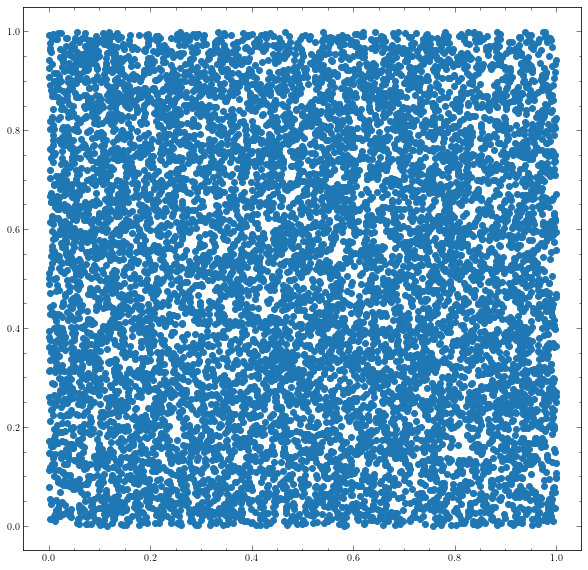

In [17]:
input_space_figure = plt.figure(figsize = (10, 10))
input_space_axis = input_space_figure.add_subplot(1, 1, 1)
input_space_axis.scatter(x_values, y_values)

### (1.4.3): Visualizing $X(x)$ vs. $x$:

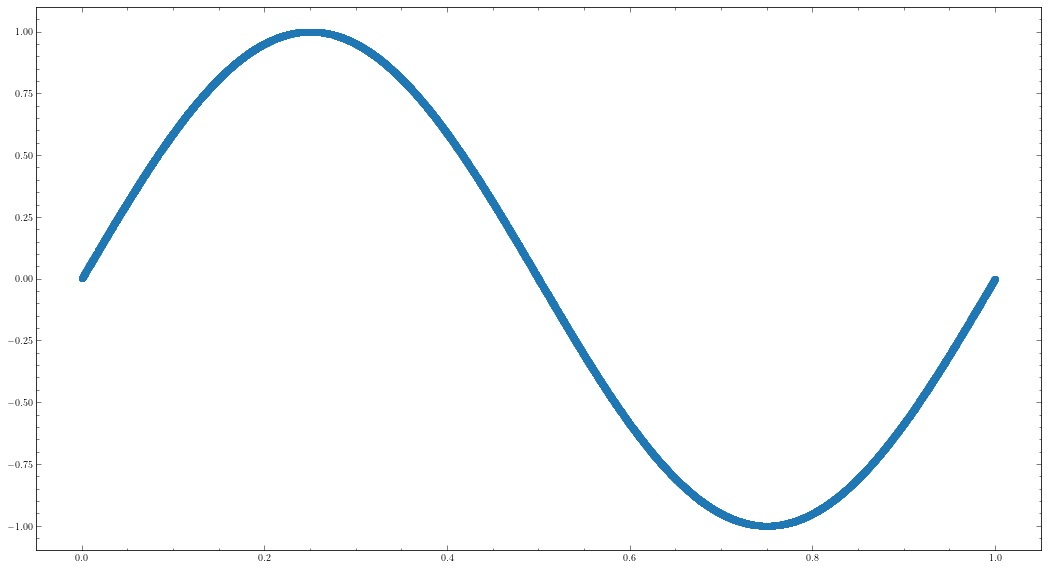

In [18]:
n_vs_x_figure = plt.figure(figsize = (18, 10))
n_vs_x_axis = n_vs_x_figure.add_subplot(1, 1, 1)
n_vs_x_axis.scatter(x_values, lambdified_X_function_of_x(x_values))

### (1.4.2): Visualizing $Y(y)$ vs. $y$:

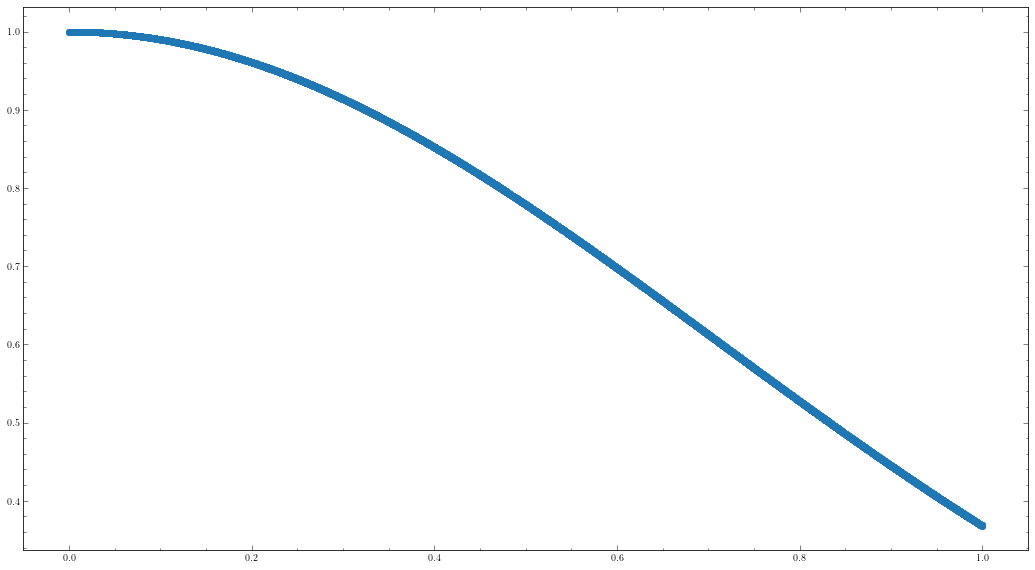

In [19]:
f_vs_p_figure = plt.figure(figsize = (18, 10))
f_vs_p_axis = f_vs_p_figure.add_subplot(1, 1, 1)
f_vs_p_axis.scatter(y_values, lambdified_Y_function_of_y(y_values))

### (1.4.3): Visualizing Product $X(x)Y(y)$:

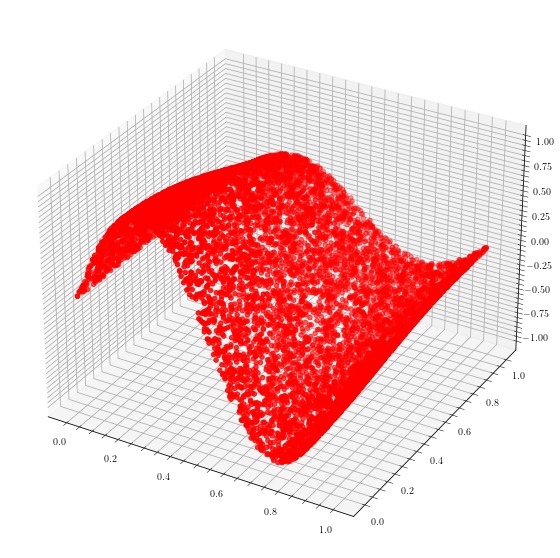

In [20]:
f_vs_p_figure = plt.figure(figsize = (18, 10))
f_vs_p_axis = f_vs_p_figure.add_subplot(1, 1, 1, projection = "3d")
f_vs_p_axis.scatter(x_values, y_values, lambdified_Y_function_of_y(y_values) * lambdified_X_function_of_x(x_values), color = 'red')

### (1.4.4): Visualizing Function $f(x, y)$:

What we should see here is the *exact same* as what we got above. There should be absolutely *no difference.*

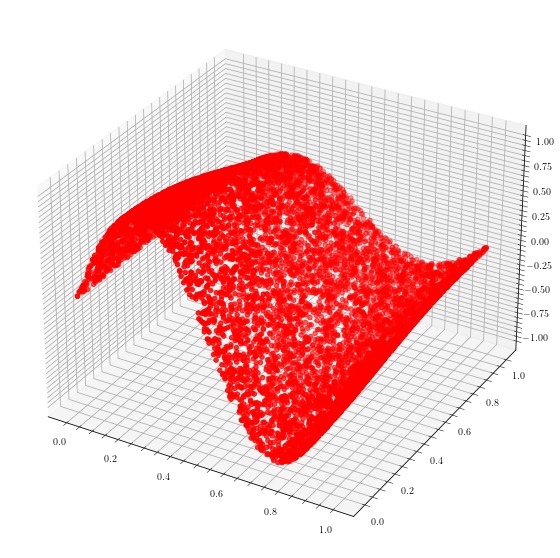

In [21]:
f_vs_p_figure = plt.figure(figsize = (18, 10))
f_vs_p_axis = f_vs_p_figure.add_subplot(1, 1, 1, projection = "3d")
f_vs_p_axis.scatter(x_values, y_values, f_values, color = 'red')

### (1.4.4): Showing values of $f(x, y) - N(x) Y(y) \approx 0$ for all elements:

We can also figure out what is going on by computing the element-wise difference:

In [22]:
lambdified_f_function_of_x_and_y(x_values, y_values) - lambdified_Y_function_of_y(y_values) * lambdified_X_function_of_x(x_values)

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

### (1.5): Normalizing Data:

#### (1.5.1): Pre-Normalization:

We first need to show that the input data falls within the first quadrant.

In [23]:
print(f"> Max x-value is: {np.max(x_values)}")
print(f"> Min x-value is: {np.min(x_values)}")
print(f"> Max y-value is: {np.max(y_values)}")
print(f"> Min y-value is: {np.min(y_values)}")

print(f"> Max normalized X(x) is: {np.max(lambdified_X_function_of_x(x_values))}")
print(f"> Min normalized X(x) is: {np.min(lambdified_X_function_of_x(x_values))}")
print(f"> Max normalized Y(y) is: {np.max(lambdified_Y_function_of_y(y_values))}")
print(f"> Min normalized Y(y) is: {np.min(lambdified_Y_function_of_y(y_values))}")

> Max x-value is: 0.9999125599861145
> Min x-value is: 0.00011255986464675516
> Max y-value is: 0.9998691082000732
> Min y-value is: 9.859974670689553e-05
> Max normalized X(x) is: 0.9999998211860657
> Min normalized X(x) is: -0.9999995231628418
> Max normalized Y(y) is: 1.0
> Min normalized Y(y) is: 0.36797571182250977


#### (1.5.2): Normalizing:

In [24]:
# (): Normalizing input x values:
maximum_x_value, minimum_x_value = np.max(x_values), np.min(x_values)
# (): The line below actually normalizes x input values:
x_values_normalized = (x_values - minimum_x_value) / (maximum_x_value - minimum_x_value)

# (): Normalizing input y values:
maximum_y_value, minimum_y_value = np.max(y_values), np.min(y_values)
# (): The line below actually normalizes y input values:
y_values_normalized = (y_values - minimum_y_value) / (maximum_y_value - minimum_y_value)

# (): Prepare to normalize X(x) values:
maximum_X_function_value, minimum_X_function_value = np.max(lambdified_X_function_of_x(x_values)), np.min(lambdified_X_function_of_x(x_values))
# (): Actually normalize X(x) values:
X_values_normalized = (lambdified_X_function_of_x(x_values) - minimum_X_function_value) / (maximum_X_function_value - minimum_X_function_value)

# (): Prepare to normalize Y(y) values:
maximum_Y_function_value, minimum_Y_function_value = np.max(lambdified_Y_function_of_y(y_values)), np.min(lambdified_Y_function_of_y(y_values))
# (): Actually normalize Y(y) values:
Y_values_normalized = (lambdified_Y_function_of_y(y_values) - minimum_Y_function_value) / (maximum_Y_function_value - minimum_Y_function_value)

# (): Prepare to normalize f(x, y) values:
maximum_f_function_value, minimum_f_function_value = np.max(f_values), np.min(f_values)
# (): Actually normalize f(x, y) values:
f_values_normalized = (f_values- minimum_f_function_value) / (maximum_f_function_value - minimum_f_function_value)

##### (1.5.2.1): Checking Normalization Effects:

In [25]:
print(f"> Max normalized x-value is: {np.max(x_values_normalized)}")
print(f"> Min normalized x-value is: {np.min(x_values_normalized)}")
print(f"> Max normalized y-value is: {np.max(y_values_normalized)}")
print(f"> Min normalized y-value is: {np.min(y_values_normalized)}")

print(f"> Max normalized X(x) is: {np.max(X_values_normalized)}")
print(f"> Min normalized X(x) is: {np.min(X_values_normalized)}")
print(f"> Max normalized Y(y) is: {np.max(Y_values_normalized)}")
print(f"> Min normalized Y(y) is: {np.min(Y_values_normalized)}")

> Max normalized x-value is: 1.0
> Min normalized x-value is: 0.0
> Max normalized y-value is: 1.0
> Min normalized y-value is: 0.0
> Max normalized X(x) is: 1.0
> Min normalized X(x) is: 0.0
> Max normalized Y(y) is: 1.0
> Min normalized Y(y) is: 0.0


#### (1.5.2): Visualizing the Normalization

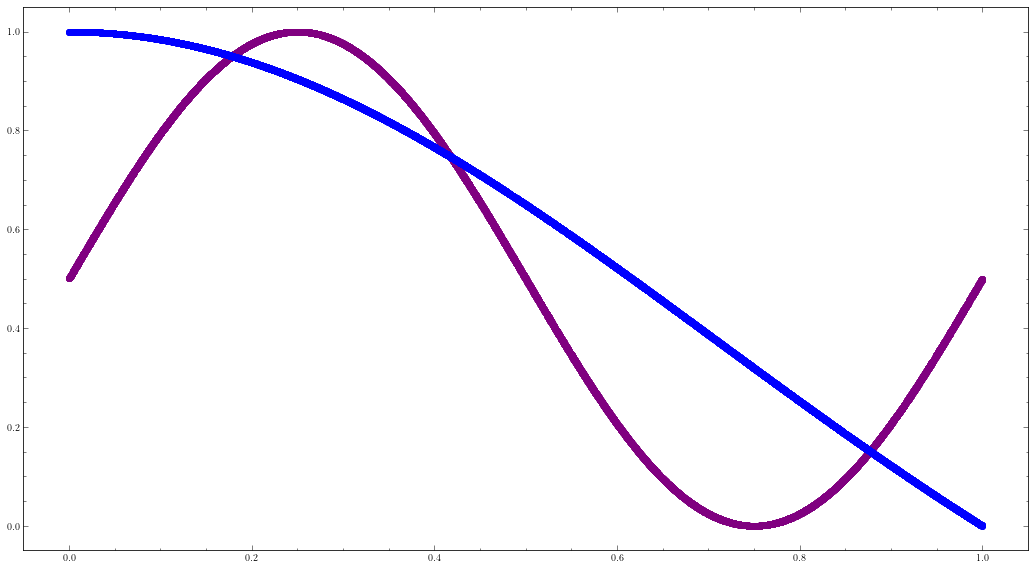

In [26]:
analysis_figure = plt.figure(figsize = (18, 10))
analysis_axis = analysis_figure.add_subplot(1, 1, 1)
analysis_axis.scatter(x_values_normalized, X_values_normalized, color = "purple")
analysis_axis.scatter(y_values_normalized, Y_values_normalized, color = "blue")

## (2): Building the DNN for $f(x, y) = X(x) Y(y)$

### (2.1): DNN Hyperparameter Settings:

In [27]:
SETTING_VERBOSE = True
SETTING_DEBUG = True

LEARNING_RATE = 0.01

BATCH_SIZE_LOCAL_FITS = 32
BATCH_SIZE_GLOBAL_FITS = 10

EARLY_STOP_PATIENCE = 20
LEARNING_RATE_PATIENCE = 20
MODIFY_LR_FACTOR = 0.9
SETTING_DNN_TRAINING_VERBOSE = 1

EPOCHS = 200

### (2.2): DNN Architecture:

In [28]:
dnn_network_input = Input(
    shape = (2, ),
    name = 'input_layer')

# (3): Define the Model Architecture:
x1 = Dense(32, activation = "relu")(dnn_network_input)
x2 = Dense(16, activation = "relu")(x1)
x3 = Dense(16, activation = "relu")(x2)
x4 = Dense(16, activation = "relu")(x3)
dnn_network_output = Dense(1, activation = "linear", name = 'output_y_value')(x4)

# (4): Define the model as as Keras Model:
tensorflow_network = Model(
    inputs = dnn_network_input,
    outputs = dnn_network_output,
    name = "basic_function_predictor")

tensorflow_network.compile(
    optimizer = keras.optimizers.Adam(learning_rate = LEARNING_RATE),
    loss = tf.keras.losses.MeanSquaredError(),
    metrics = [
        tf.keras.metrics.MeanSquaredError()
        ])

tensorflow_network.summary()

I0000 00:00:1750712700.565359 1686750 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1750712700.600410 1686750 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1750712700.600613 1686750 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1750712700.602642 1686750 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "basic_function_predictor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_y_value (Dense)          │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,185 (4.63 KB)

 Trainable params: 1,185 (4.63 KB)

 Non-trainable params: 0 (0.00 B)

## (3): DNN Data Preprocessing:

### (3.1): Data Index Splitting:

In [29]:
split_percentage = 0.2

xy_pairs = np.stack(
    (y_values, x_values), 
    axis = 1)


number_of_samples = xy_pairs.shape[0]

indices = np.arange(number_of_samples)

np.random.shuffle(indices)

### (3.2): Data Splitting:

We need to split the data into (i) training data, (ii) validation data, and (iii) testing pieces.

In [30]:
split_testing = int(number_of_samples * 0.2)
split_validation = int(number_of_samples * 0.1)

validation_indices = indices[split_testing:split_testing + split_validation]
validation_x_data = xy_pairs[validation_indices]
validation_y_data = lambdified_f_function_of_x_and_y(y_values, x_values)[validation_indices]

training_indices = indices[split_testing + split_validation:]
training_x_data = xy_pairs[training_indices]
training_y_data = lambdified_f_function_of_x_and_y(y_values, x_values)[training_indices]

testing_indices = indices[:split_testing]
testing_x_data = xy_pairs[testing_indices]
testing_y_data = lambdified_f_function_of_x_and_y(y_values, x_values)[testing_indices]

## (4): DNN Training and Evaluation:

### (4.1): DNN Training:

In [31]:
start_time_in_milliseconds = datetime.datetime.now().replace(microsecond = 0)

history_of_training = tensorflow_network.fit(
    training_x_data,
    training_y_data,
    validation_data = (testing_x_data, testing_y_data),
    epochs = EPOCHS,
    batch_size = BATCH_SIZE_LOCAL_FITS,
    verbose = SETTING_DNN_TRAINING_VERBOSE)

end_time_in_milliseconds = datetime.datetime.now().replace(microsecond = 0)
print(f"> Replica job finished in {end_time_in_milliseconds - start_time_in_milliseconds}ms.")

Epoch 1/200


I0000 00:00:1750712701.735205 1686839 service.cc:146] XLA service 0x76c8e4004cc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750712701.735239 1686839 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti Laptop GPU, Compute Capability 8.6
2025-06-23 16:05:01.758436: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-06-23 16:05:01.881412: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


141/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1126 - mean_squared_error: 0.1126

I0000 00:00:1750712702.410811 1686839 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0904 - mean_squared_error: 0.0904 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 2/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 4.6882e-04 - val_mean_squared_error: 4.6882e-04
Epoch 3/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 4/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 4.2032e-04 - val_mean_squared_error: 4.2032e-04
Epoch 5/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5625e-04 - mean_squared_error: 8.5625e-04 - val_loss: 3.0996e-04 - val_mean_squared_error: 3.0996e-04
Epoch 6/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0707e-04 - mean_squared_error: 7.0707e-04 - val_loss: 2.7081e-04 - val_mean_squared_error: 2.7081e-04
Epoch 7/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010 - 

### (4.2): DNN Evaluation:

### (4.2.1): Extract Evaluation Data:

In [32]:
training_loss_data = history_of_training.history['loss']
validation_loss_data = history_of_training.history['val_loss']

#### (4.2.2): Perform Evaluation:

In [33]:
validaton_loss, validation_mae = tensorflow_network.evaluate(testing_x_data, testing_y_data)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 1.0527e-04 - mean_squared_error: 1.0527e-04


#### (4.2.3): Visualize Evaluation:

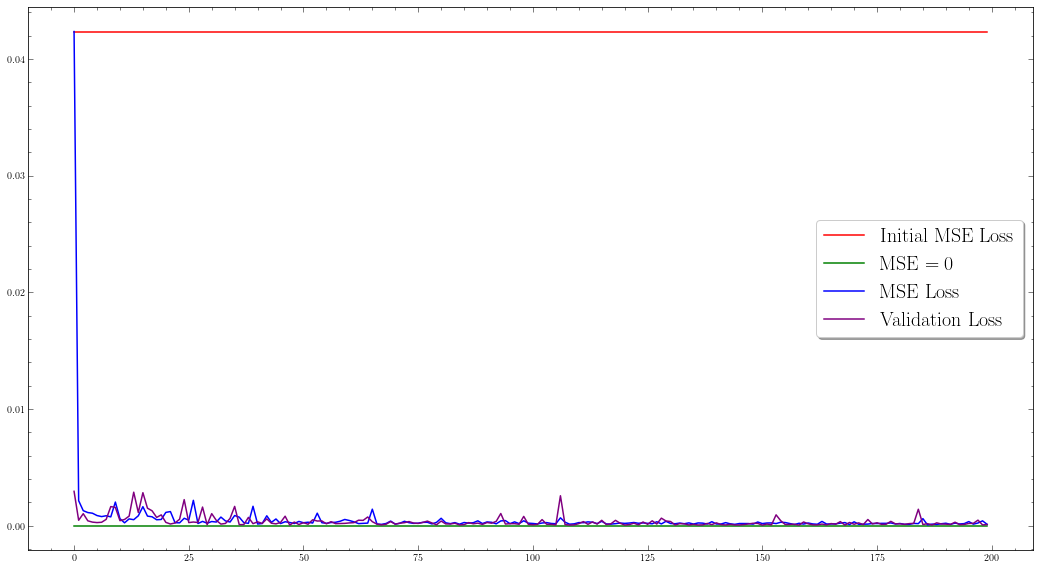

In [34]:
evaluation_figure = plt.figure(figsize = (18, 10))
evaluation_axis = evaluation_figure.add_subplot(1, 1, 1)
evaluation_axis.plot(np.arange(0, EPOCHS, 1), np.array([np.max(training_loss_data) for number in training_loss_data]), color = "red", label = "Initial MSE Loss")
evaluation_axis.plot(np.arange(0, EPOCHS, 1), np.zeros(shape = EPOCHS), color = "green", label = r"MSE $= 0$")
evaluation_axis.plot(np.arange(0, EPOCHS, 1), training_loss_data, color = "blue", label = "MSE Loss")
evaluation_axis.plot(np.arange(0, EPOCHS, 1), validation_loss_data, color = "purple", label = "Validation Loss")
evaluation_axis.legend(fontsize = 20, shadow = True)

## (5): DNN Predictions:

### (5.1): Numerical Predictions:

In [35]:
model_predictions = np.array(tensorflow_network.predict(training_x_data))

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


### (5.2): Visualizing Predictions:

#### (5.2.1): Scatter Plot:

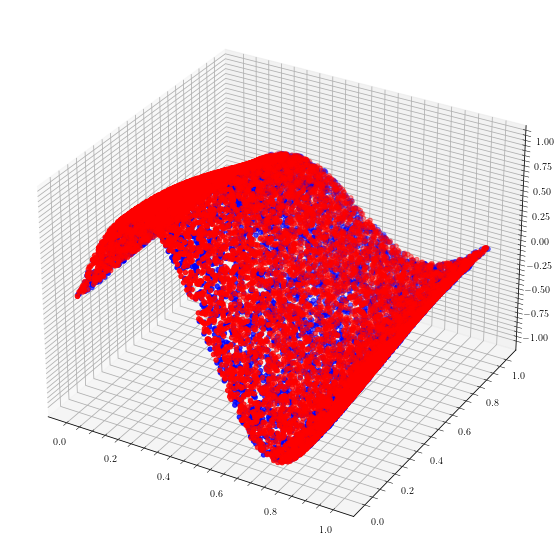

In [36]:
f_vs_p_figure = plt.figure(figsize = (18, 10))
f_vs_p_axis = f_vs_p_figure.add_subplot(1, 1, 1, projection = "3d")
f_vs_p_axis.scatter(x_values, y_values, lambdified_f_function_of_x_and_y(x_values, y_values), color = 'red')
f_vs_p_axis.scatter(training_x_data[:,0], training_x_data[:,1], model_predictions, color = 'blue')

#### (5.2.2): Surface Plot:

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


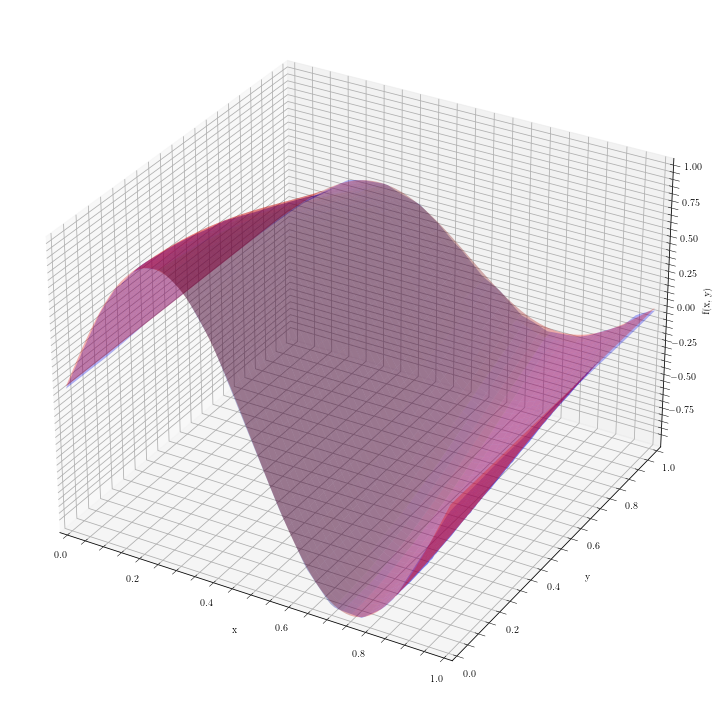

In [37]:
x_min, x_max = x_values.min(), x_values.max()
y_min, y_max = y_values.min(), y_values.max()

x_grid, y_grid = np.meshgrid(
    np.linspace(x_min, x_max, 100),
    np.linspace(y_min, y_max, 100))

grid_points = np.c_[
    x_grid.ravel(), 
    y_grid.ravel()]

z_true = lambdified_f_function_of_x_and_y(grid_points[:, 0], grid_points[:, 1]).reshape(x_grid.shape)
z_model = tensorflow_network.predict(grid_points).reshape(x_grid.shape)

surface_plot_figure = plt.figure(figsize = (18, 10))
surface_plot_axis = surface_plot_figure.add_subplot(1, 1, 1, projection = '3d')

surface_plot_axis.plot_surface(x_grid, y_grid, z_true, color = 'red', alpha = 0.3, label = 'True Function')
surface_plot_axis.plot_surface(x_grid, y_grid, z_model, color = 'blue', alpha = 0.3, label = 'Model Prediction')

surface_plot_axis.set_xlabel('x')
surface_plot_axis.set_ylabel('y')
surface_plot_axis.set_zlabel('f(x, y)')

surface_plot_axis.set_xlim(0, 1)
surface_plot_axis.set_ylim(0, 1)

surface_plot_axis.view_init(elev = 30, azim = -60) 

plt.tight_layout()
plt.show()

### (5.2.3): Surface Subtraction Plot:

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step


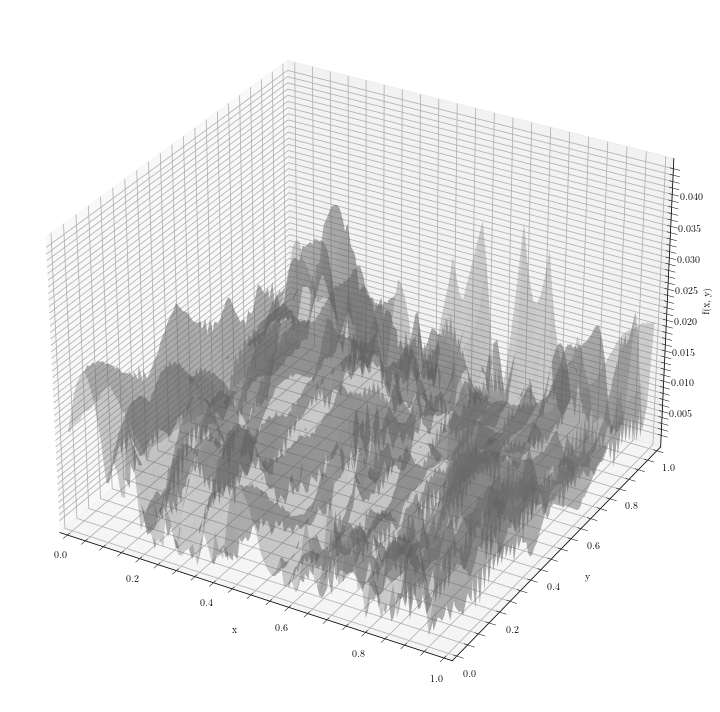

In [38]:
x_min, x_max = x_values.min(), x_values.max()
y_min, y_max = y_values.min(), y_values.max()

x_grid, y_grid = np.meshgrid(
    np.linspace(x_min, x_max, 100),
    np.linspace(y_min, y_max, 100))

grid_points = np.c_[
    x_grid.ravel(), 
    y_grid.ravel()]

z_true = lambdified_f_function_of_x_and_y(grid_points[:, 0], grid_points[:, 1]).reshape(x_grid.shape)
z_model = tensorflow_network.predict(grid_points).reshape(x_grid.shape)

surface_plot_figure = plt.figure(figsize = (18, 10))
surface_plot_axis = surface_plot_figure.add_subplot(1, 1, 1, projection = '3d')

surface_plot_axis.plot_surface(x_grid, y_grid, np.abs(z_true - z_model), color = 'gray', alpha = 0.3, label = 'True Function')

surface_plot_axis.set_xlabel('x')
surface_plot_axis.set_ylabel('y')
surface_plot_axis.set_zlabel('f(x, y)')

surface_plot_axis.set_xlim(0, 1)
surface_plot_axis.set_ylim(0, 1)

surface_plot_axis.view_init(elev = 30, azim = -60) 

plt.tight_layout()
plt.show()

## (6): Try to Fix $X(x)$ Only with $Y(y)$ Known:

### (6.1): DNN Architecture for Only $X(x)$:

We need to understand that this DNN is different from the previous one in its input; it only takes in $x$, not and $x$ and $y$. Remember that we're trying to represent $X(x)$ with and $X^{\text{DNN}}(x)$.

Note that the loss we are using here is custom, and it is defined according to:

$$L_{\text{MSE}}(\hat{\vec{y}}, \vec{y}) := \frac{1}{N} \sum_{i = 1}^{N} ||f(x, y)- X^{\text{DNN}}Y(y)||_{2}^{2}.$$

In [51]:
x_input = tf.keras.Input(shape=(1,))
x1 = Dense(32, activation = 'tanh', kernel_initializer = 'glorot_uniform')(x_input)
x1_dropout = Dropout(0.1)(x1, training = True)
x2 = Dense(32, activation = 'tanh', kernel_initializer = 'glorot_uniform')(x1_dropout)
x2_dropout = Dropout(0.1)(x1, training = True)
x3 = Dense(16, activation = 'tanh', kernel_initializer = 'glorot_uniform')(x2_dropout)
x_output = Dense(1)(x3)

tensorflow_model_for_x_function = tf.keras.Model(
    inputs = x_input, 
    outputs = x_output)

@tf.function
def custom_loss(y_true_normalized, x_predicted, y_input):
    """
    ## Description:
    Computes MSE of:  Y(y) * (f(x, y)/Y(y) - X^{DNN}(x))
    
    ## Arguments:
        - y_true_normalized: normalized values of f(x, y)
        - x_predicted: predicted normalized X(x)
        - y_input: raw y values (not normalized)

    ## Notes:
    This loss will get .call()'ed with `y_true` and `y_pred`.
    """

    # (1): Ensure the y_input is of this type... I don't know why!!
    y_input = tf.cast(y_input, tf.float32)

    # (2): With the y_input, compute (because it's "available") the Y(y) value (not normalized!):
    y_function = tf.exp(-1.0 * y_input**2)

    # (3): Proactive clipping to avoid gradient explosions:
    # clipped_y_function = tf.clip_by_value(y_function, 1e-5, 1e5)

    # (4): Un-normalize f(x, y):
    true_value_of_f = y_true_normalized * minimum_f_function_value + maximum_f_function_value

    # (): Un-normalized X^{DNN}(x):
    x_predicted = tf.squeeze(x_predicted) * minimum_x_value + maximum_x_value

    # (): Compue the total error:
    residuals = y_function * ((true_value_of_f / y_function) - x_predicted)

    # (): Compute the mean:
    mean_residuals = tf.reduce_mean(tf.square(residuals))
    
    # (): Return the computed loss:
    return mean_residuals


optimizer = keras.optimizers.Adam(learning_rate = LEARNING_RATE)

NameError: name 'Dropout' is not defined

### (6.2): DNN Hyperparameters:

The DNN hyperparameters for $X^{\text{DNN}}(x)$ don't need to change much. So, let's just skip this for now.

### (6.3): Data Preprocessing

#### (6.3.1): Data Index Splitting:

In [52]:
x_training, x_validation, y_training, y_validation, f_training, f_validation = train_test_split(
    x_values_normalized,
    y_values_normalized,
    f_values_normalized,
    test_size = 0.2,
    random_state = 42)

x_training = x_values_normalized
y_training = y_values_normalized
f_training = f_values_normalized

training_dataset = tf.data.Dataset.from_tensor_slices(
    tensors = ((x_training, y_training), f_training))

validation_dataset = tf.data.Dataset.from_tensor_slices((
    (x_validation, y_validation),
    f_validation))

training_dataset = training_dataset.shuffle(buffer_size = 1024).batch(BATCH_SIZE_GLOBAL_FITS)
validation_dataset = validation_dataset.batch(BATCH_SIZE_GLOBAL_FITS)

In [53]:
print(len(x_training))
print(len(y_training))
print(len(f_training))

10000
10000
10000


### (6.4): DNN Training and Evaluation:

#### (6.4.1): DNN Training:

In [54]:
training_loss_history = []
validation_loss_history = []

start_time_in_milliseconds = datetime.datetime.now().replace(microsecond = 0)

for current_epoch in range(EPOCHS):
    current_epoch_training_loss = 0

    for (x_batch, y_batch), f_batch in training_dataset:
        with tf.GradientTape() as gradient_tape:

            predicted_x_value = tensorflow_model_for_x_function(
                x_batch, 
                training = True)

            loss = custom_loss(f_batch, predicted_x_value, y_batch)

        gradients = gradient_tape.gradient(
            loss, 
            tensorflow_model_for_x_function.trainable_weights)

        optimizer.apply_gradients(
            zip(
                gradients, 
                tensorflow_model_for_x_function.trainable_weights))

        current_epoch_training_loss += loss.numpy()

    current_epoch_validation_loss = 0
    
    for (x_batch, y_batch), f_batch in validation_dataset:

        predicted_x_value = tensorflow_model_for_x_function(x_batch, training = False)

        loss = custom_loss(f_batch, predicted_x_value, y_batch)

        current_epoch_validation_loss += loss.numpy()

    current_epoch_validation_loss /= len(validation_dataset)

    training_loss_history.append(current_epoch_training_loss / len(training_dataset))
    validation_loss_history.append(current_epoch_validation_loss)

    print(f"> Epoch #{current_epoch} found L = {current_epoch_training_loss:.4f} & LV = {current_epoch_validation_loss:.4f}")
    # print(f"> Epoch #{current_epoch} found L = {current_epoch_training_loss:.4f}")

end_time_in_milliseconds = datetime.datetime.now().replace(microsecond = 0)
print(f"> Replica job finished in {end_time_in_milliseconds - start_time_in_milliseconds}ms.")


KeyboardInterrupt: 

#### (6.4.2): DNN Evaluation:

##### (6.4.2.1): Visualize Evaluation:

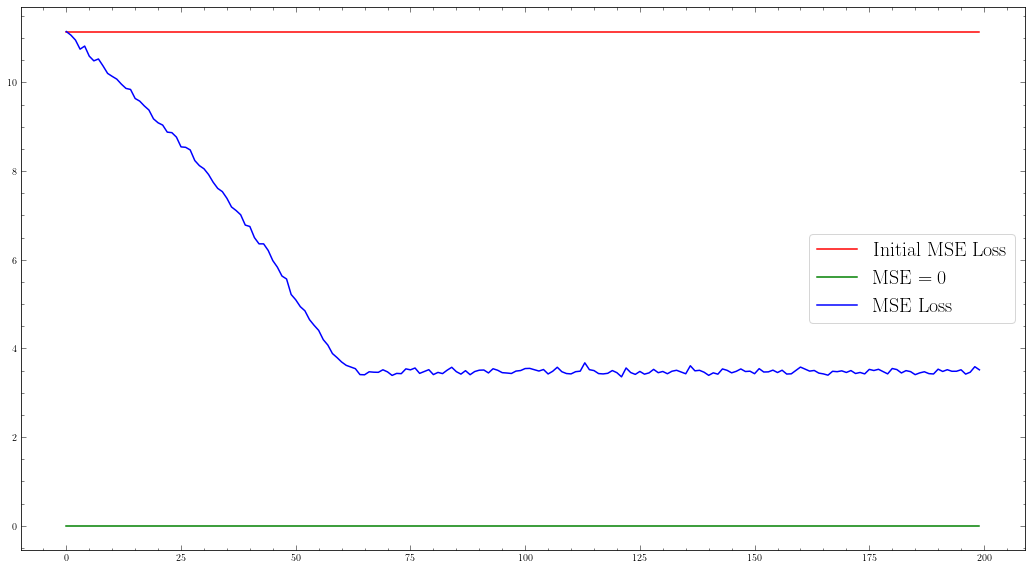

In [165]:
evaluation_figure = plt.figure(figsize = (18, 10))
evaluation_axis = evaluation_figure.add_subplot(1, 1, 1)
evaluation_axis.plot(np.arange(0, EPOCHS, 1), np.array([np.max(training_loss_history) for number in training_loss_history]), color = "red", label = "Initial MSE Loss")
evaluation_axis.plot(np.arange(0, EPOCHS, 1), np.zeros(shape = EPOCHS), color = "green", label = r"MSE $= 0$")
evaluation_axis.plot(np.arange(0, EPOCHS, 1), training_loss_history, color = "blue", label = "MSE Loss")
# evaluation_axis.plot(np.arange(0, EPOCHS, 1), validation_loss_history, color = "purple", label = "Validation Loss")
evaluation_axis.legend(fontsize = 20)

### (6.5): DNN Predictions:

#### (6.5.1): Numerical Predictions:

In [166]:
model_predictions = np.array(tensorflow_model_for_x_function.predict(x_values_normalized))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


#### (6.5.2): Visualizing Predictions:

##### (6.5.2.1): Scatterplot for just $N(x)$ vs. $x$:

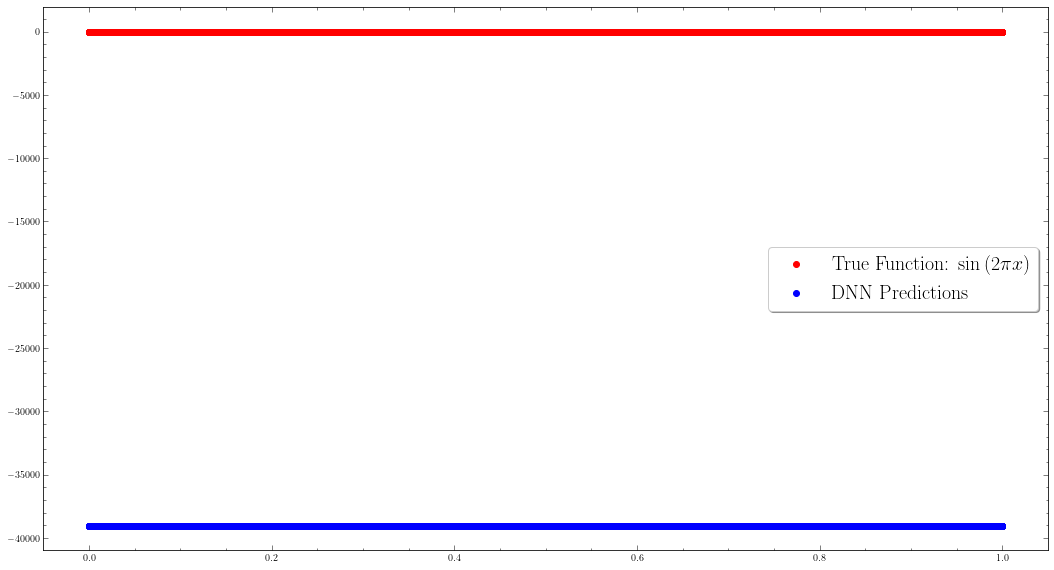

In [167]:
f_vs_p_figure = plt.figure(figsize = (18, 10))
f_vs_p_axis = f_vs_p_figure.add_subplot(1, 1, 1)
f_vs_p_axis.scatter(x_values, X_values_normalized, color = 'red', label = rf"True Function: ${sp.latex(X_function_of_x)}$")
f_vs_p_axis.scatter(x_values, model_predictions, color = 'blue', label = "DNN Predictions")
plt.legend(fontsize = 20, shadow = True)

##### (6.5.2.1): Scatterplot for $X^{\text{DNN}}(x) Y(y)$:

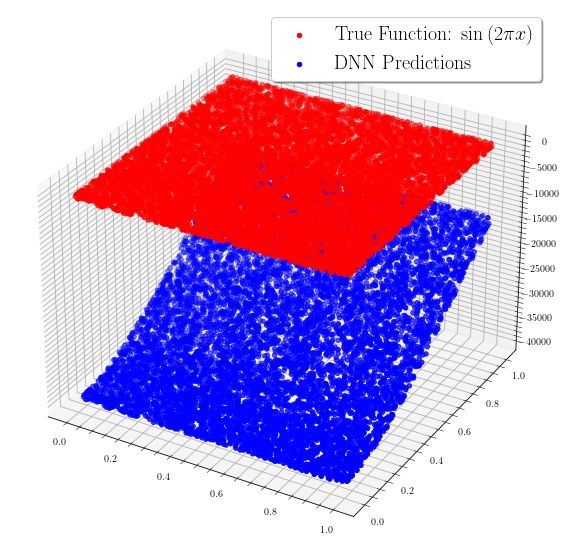

In [168]:
f_vs_p_figure = plt.figure(figsize = (18, 10))
f_vs_p_axis = f_vs_p_figure.add_subplot(1, 1, 1, projection = "3d")
f_vs_p_axis.scatter(x_values, y_values, f_values, color = 'red', label = rf"True Function: ${sp.latex()}$")
f_vs_p_axis.scatter(x_values, y_values, model_predictions.ravel() * lambdified_Y_function_of_y(y_values), color = 'blue', label = "DNN Predictions")
plt.legend(fontsize = 20, shadow = True)

##### (6.5.2.3): Surface Plot for just $N(x)$ vs. $x$:

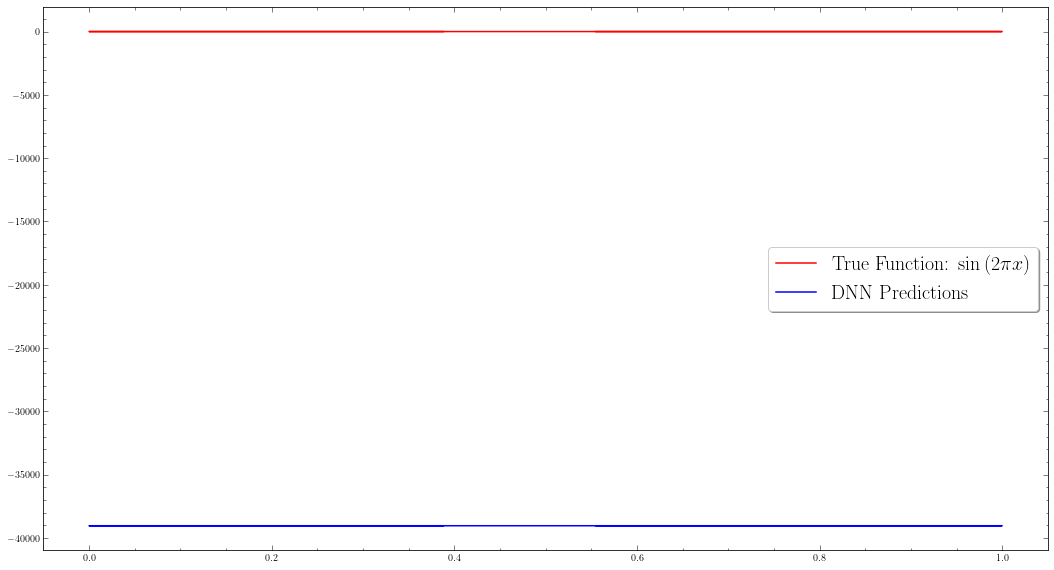

In [169]:
f_vs_p_figure = plt.figure(figsize = (18, 10))
f_vs_p_axis = f_vs_p_figure.add_subplot(1, 1, 1)
f_vs_p_axis.plot(x_values, lambdified_X_function_of_x(x_values), color = 'red', label = rf"True Function: ${sp.latex(X_function_of_x)}$")
f_vs_p_axis.plot(x_values, model_predictions, color = 'blue', label = "DNN Predictions")
plt.legend(fontsize = 20, shadow = True)

##### (6.5.2.4): Surface Plot for $X^{\text{DNN}}(x) Y(y)$:

In [170]:
x_min, x_max = x_values.min(), x_values.max()
y_min, y_max = y_values.min(), y_values.max()

x_grid, y_grid = np.meshgrid(
    np.linspace(x_min, x_max, 1000),
    np.linspace(y_min, y_max, 1000))

grid_points = np.c_[
    x_grid.ravel(), 
    y_grid.ravel()]

z_true = lambdified_f_function_of_x_and_y(grid_points[:, 0], grid_points[:, 1]).reshape(x_grid.shape)
z_model = (tensorflow_model_for_x_function.predict(x_values) * lambdified_Y_function_of_y(y_values)).reshape(x_grid.shape)

surface_plot_figure = plt.figure(figsize = (18, 10))
surface_plot_axis = surface_plot_figure.add_subplot(1, 1, 1, projection = '3d')

surface_plot_axis.plot_surface(x_grid, y_grid, z_true, color = 'red', alpha = 0.3, label = 'True Function')
surface_plot_axis.plot_surface(x_grid, y_grid, z_model, color = 'blue', alpha = 0.3, label = 'Model Prediction')

surface_plot_axis.set_xlabel('x')
surface_plot_axis.set_ylabel('y')
surface_plot_axis.set_zlabel('f(x, y)')

surface_plot_axis.set_xlim(0, 1)
surface_plot_axis.set_ylim(0, 1)

surface_plot_axis.view_init(elev = 30, azim = -60) 

plt.legend(fontsize = 20, shadow = True)
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step


ValueError: cannot reshape array of size 100000000 into shape (1000,1000)